In [31]:
%matplotlib inline

from matplotlib import pylab as plt
import numpy as np
import scipy.io.wavfile
from scipy.signal import kaiser, decimate
from copy import copy

from ipywidgets import *

analyzing data/002_M.wav ...


(array([ 12.77172731,  12.92836327,  13.1037454 , ...,   6.36395154,
          6.3292963 ,   5.44931716]),
 array([ 10.68222428,  10.76864158,  10.94237371, ...,   4.24445347,
          4.03234165,   3.18344101]))

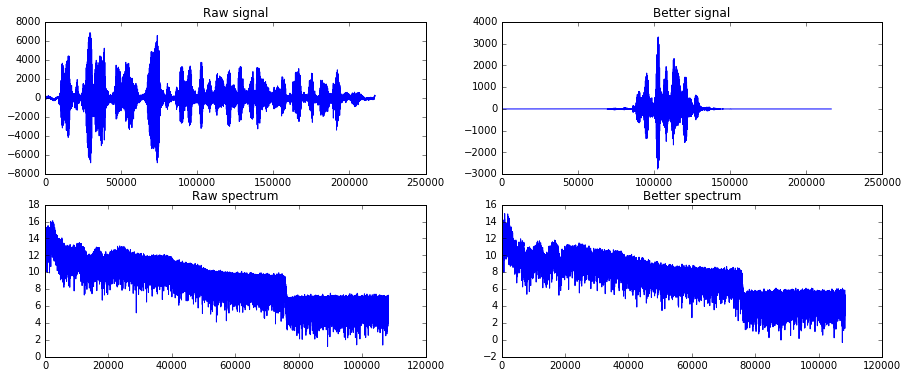

In [42]:
def KaiserBetaTest(filename = "data/006_K.wav", kaiserBeta=100):

  print('analyzing ' + filename + ' ...')
  try:
    w, rawSignal = scipy.io.wavfile.read(filename)
  except:
    print("File: \"" + filename + "\" didn't read.")
    print("")
  else:
    samplesCount = len(rawSignal)
    t = float(samplesCount) / w

    if not isinstance(rawSignal[0], np.int16):
      rawSignal = [s[0] for s in rawSignal]
    signal = rawSignal * kaiser(samplesCount, kaiserBeta) #co?

    rawSpectrum = np.log(abs(np.fft.rfft(rawSignal)))
    spectrum = np.log(abs(np.fft.rfft(signal)))
       
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    fig.add_subplot(221)
    plt.plot(rawSignal)
    plt.title("Raw signal");
    
    fig.add_subplot(222)
    plt.plot(signal)
    plt.title("Better signal")
    
    fig.add_subplot(223)
    plt.plot(rawSpectrum)
    plt.title("Raw spectrum")
    
    fig.add_subplot(224)
    plt.plot(spectrum)
    plt.title("Better spectrum")
    
    return rawSpectrum, spectrum
    
interact(KaiserBetaTest, kaiserBeta=(50, 500, 10), filename="data/006_K.wav")